In [15]:
import pandas as pd
import numpy as np
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import plotly.graph_objects as go
import plotly.express as px
from datetime import datetime

In [16]:
pd.set_option('display.max_columns', None)
df = pd.read_csv('combined_daily.csv')

In [17]:
df.describe()

,Unnamed: 0,btc_google_adjusted,bitcoin_google_adjusted,eth_google_adjusted,ethereum_google_adjusted,doge_google_adjusted,dogecoin_google_adjusted,BTCUSD_close,BTCUSD_high,BTCUSD_low,BTCUSD_open,ETHUSD_close,ETHUSD_high,ETHUSD_low,ETHUSD_open,DOGEUSD_close,DOGEUSD_high,DOGEUSD_low,DOGEUSD_open,BTC_transactions,BTC_av_trans_value_USD,BTC_tweets,BTC_google_trends,ETH_transactions,ETH_av_trans_value_USD,ETH_tweets,ETH_google_trends,DOGE_transactions,DOGE_av_trans_value_USD,DOGE_tweets,DOGE_google_trends
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,3.650000e+02,365.000000,365.000000,3.650000e+02,365.000000,365.000000,365.000000,365.000000,3.650000e+02,365.000000,365.000000
mean,182.000000,35.447436,30.549495,44.018390,33.611540,5.235778,7.260295,47449.709514,48751.726414,45854.143774,47391.868494,2779.201441,2870.193037,2662.248928,2770.810170,0.204744,0.217355,0.191043,0.204139,267791.142466,4.950701e+05,114432.449315,142.261238,1.265204e+06,5424.065753,26587.084932,47.293348,30985.276712,2.813959e+05,48212.575342,12.318263
std,105.510663,11.974971,12.080372,12.464166,13.029910,7.437587,12.119586,9794.071162,9866.583895,9848.570409,9850.487454,1025.271470,1047.602085,1005.830052,1028.743928,0.126596,0.137868,0.114656,0.126880,45553.787795,3.267068e+05,37609.151247,58.567779,1.084653e+05,2273.853490,10518.419103,19.039255,15284.393013,2.617928e+05,70612.222452,21.515035
min,0.000000,18.761923,15.636613,22.595686,15.060885,1.645575,0.344240,29374.151889,29594.351589,28722.755271,28994.008916,730.367569,748.881631,719.601248,730.402673,0.005685,0.005685,0.004616,0.004678,121480.000000,1.439210e+05,30540.000000,76.559000,1.050189e+06,1466.000000,6939.000000,23.508000,15474.000000,2.874000e+03,2429.000000,0.500000
25%,91.000000,27.572512,22.076178,35.387714,25.212347,2.441092,2.309719,38347.063227,39740.379912,36088.990519,38180.289380,1895.552137,1958.032072,1811.245864,1886.667635,0.063845,0.069596,0.058823,0.062535,233521.000000,2.613650e+05,92346.000000,100.791000,1.197340e+06,3960.000000,18551.000000,35.376000,21760.000000,7.731300e+04,20974.000000,3.932000
50%,182.000000,33.112071,27.343347,42.591914,30.315207,3.061994,3.138130,47793.321179,49142.059149,46716.028224,47771.003108,2633.518417,2750.534979,2487.371057,2623.566080,0.219133,0.227558,0.204897,0.218811,270539.000000,3.797260e+05,107331.000000,127.125000,1.245624e+06,4940.000000,26153.000000,42.034000,26106.000000,2.047180e+05,29460.000000,5.363000
75%,273.000000,39.035790,34.172533,49.486375,37.786471,4.875626,6.095433,56216.185002,57755.754608,54368.593655,56285.354913,3638.122042,3827.812840,3551.622571,3621.364036,0.272124,0.288467,0.256727,0.272273,297259.000000,6.649860e+05,130212.000000,160.737000,1.302891e+06,6559.000000,34130.000000,53.002000,34144.000000,4.058250e+05,44401.000000,9.444000
max,364.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,67566.830088,68744.031364,66382.061008,67464.502924,4812.087614,4858.822185,4718.039256,4803.076483,0.684777,0.736435,0.608168,0.688504,401576.000000,2.450460e+06,363566.000000,505.899000,1.716600e+06,19373.000000,62007.000000,151.095000,139656.000000,1.729356e+06,967142.000000,187.988000


In [18]:
df=df.drop(['Unnamed: 0'], axis=1)

In [19]:
df.columns

Index(['datetime', 'btc_google_adjusted', 'bitcoin_google_adjusted',
       'eth_google_adjusted', 'ethereum_google_adjusted',
       'doge_google_adjusted', 'dogecoin_google_adjusted', 'BTCUSD_close',
       'BTCUSD_high', 'BTCUSD_low', 'BTCUSD_open', 'ETHUSD_close',
       'ETHUSD_high', 'ETHUSD_low', 'ETHUSD_open', 'DOGEUSD_close',
       'DOGEUSD_high', 'DOGEUSD_low', 'DOGEUSD_open', 'BTC_transactions',
       'BTC_av_trans_value_USD', 'BTC_tweets', 'BTC_google_trends',
       'ETH_transactions', 'ETH_av_trans_value_USD', 'ETH_tweets',
       'ETH_google_trends', 'DOGE_transactions', 'DOGE_av_trans_value_USD',
       'DOGE_tweets', 'DOGE_google_trends'],
      dtype='object')

Correlations for different variables

In [20]:
df['BTC_google'] = (df.btc_google_adjusted + df.bitcoin_google_adjusted)/2
df['ETH_google'] = (df.eth_google_adjusted + df.ethereum_google_adjusted)/2
df['DOGE_google'] = (df.doge_google_adjusted + df.dogecoin_google_adjusted)/2
df['week'] = pd.to_datetime(df.datetime).dt.isocalendar().week
df['dayofweek'] = pd.to_datetime(df.datetime).dt.dayofweek
df.loc[df['week'] == 53, 'week'] = 0
df

,datetime,btc_google_adjusted,bitcoin_google_adjusted,eth_google_adjusted,ethereum_google_adjusted,doge_google_adjusted,dogecoin_google_adjusted,BTCUSD_close,BTCUSD_high,BTCUSD_low,BTCUSD_open,ETHUSD_close,ETHUSD_high,ETHUSD_low,ETHUSD_open,DOGEUSD_close,DOGEUSD_high,DOGEUSD_low,DOGEUSD_open,BTC_transactions,BTC_av_trans_value_USD,BTC_tweets,BTC_google_trends,ETH_transactions,ETH_av_trans_value_USD,ETH_tweets,ETH_google_trends,DOGE_transactions,DOGE_av_trans_value_USD,DOGE_tweets,DOGE_google_trends,BTC_google,ETH_google,DOGE_google,week,dayofweek
0,2021-01-01,37.715354,28.642143,22.595686,15.060885,2.012380,0.418217,29374.151889,29594.351589,28816.444067,28994.008916,730.367569,748.881631,719.792258,737.708378,0.005685,0.005685,0.004616,0.004678,257931.0,181787.0,55480.0,139.530,1136582.0,1634.0,6939.0,23.508,34595.0,3697.0,2669.0,0.500,33.178749,18.828285,1.215298,0,4
1,2021-01-02,60.547520,47.591570,31.190364,21.833229,5.907308,3.839233,32127.267939,33155.118819,29115.168570,29376.455834,774.534968,786.752141,719.601248,730.402673,0.010615,0.013288,0.005599,0.005694,296960.0,223687.0,145059.0,243.368,1170839.0,1650.0,8771.0,31.453,57582.0,25652.0,69495.0,4.235,54.069545,26.511797,4.873270,0,5
2,2021-01-03,73.401183,60.034468,58.499260,41.307931,6.145332,3.901965,32782.024466,34596.054761,32055.917694,32129.407356,975.507673,1006.528434,771.561645,774.511865,0.009771,0.013750,0.009415,0.010524,358958.0,206058.0,141596.0,285.763,1234419.0,4064.0,19081.0,62.154,45008.0,41754.0,34797.0,3.678,66.717825,49.903596,5.023648,0,6
3,2021-01-04,59.871011,49.402665,73.747883,51.618067,3.527074,1.660322,31971.913522,33432.592144,28722.755271,32895.563118,1040.233048,1152.827664,912.305338,982.001164,0.009767,0.011339,0.007911,0.009840,373561.0,163866.0,82412.0,235.192,1275169.0,6059.0,20818.0,74.619,39268.0,29734.0,18656.0,1.637,54.636838,62.682975,2.593698,1,0
4,2021-01-05,46.391577,40.917347,53.896949,38.620894,2.819928,0.980534,33992.429344,34437.590592,30261.626195,32177.467131,1100.006099,1123.100290,988.147971,1060.279090,0.009920,0.010203,0.008976,0.009767,353934.0,201248.0,68133.0,195.552,1258347.0,4016.0,12811.0,57.702,33127.0,28718.0,13411.0,1.182,43.654462,46.258921,1.900231,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2021-12-27,31.372276,21.081971,45.708397,25.130825,2.547444,2.316626,50640.418804,51953.625416,50499.468676,50818.733330,4037.547692,4125.163765,4033.737900,4065.761386,0.187705,0.192923,0.187262,0.190188,249400.0,641079.0,105198.0,97.230,1251961.0,5554.0,38999.0,36.567,22116.0,708342.0,20903.0,4.788,26.227123,35.419611,2.432035,52,0
361,2021-12-28,34.039554,22.824088,44.379664,26.358890,2.370692,2.103387,47588.854777,50643.314095,47457.360125,50643.314095,3800.893085,4032.175564,3774.365244,4027.251053,0.174117,0.187425,0.173128,0.187425,265288.0,603487.0,118350.0,101.378,1241032.0,6265.0,44527.0,35.643,21544.0,1329035.0,21528.0,4.187,28.431821,35.369277,2.237039,52,1
362,2021-12-29,33.404488,21.941258,48.100115,26.305496,2.277897,2.003294,46444.710491,48101.584301,46313.454085,47625.850484,3628.531671,3827.812840,3623.259365,3801.717846,0.167765,0.177339,0.167072,0.174603,275938.0,602901.0,111906.0,99.935,1252229.0,4969.0,49433.0,38.932,23661.0,1226340.0,21216.0,4.368,27.672873,37.202805,2.140596,52,2
363,2021-12-30,32.705915,22.117824,48.830918,27.053013,2.178473,2.164312,47178.125843,47871.655884,46073.532732,46490.606049,3713.852163,3767.559870,3595.204883,3632.219817,0.171313,0.175608,0.165381,0.168137,244902.0,606245.0,126646.0,98.683,1255688.0,9949.0,40164.0,37.698,23972.0,829210.0,19382.0,4.205,27.411870,37.941966,2.171393,52,3


In [21]:
df_weekly = pd.DataFrame()
df_weekly['BTCUSD_high'] = df.groupby('week').BTCUSD_high.max()
df_weekly['BTCUSD_low'] = df.groupby('week').BTCUSD_low.min()
df_weekly['ETHUSD_high'] = df.groupby('week').ETHUSD_high.max()
df_weekly['ETHUSD_low'] = df.groupby('week').ETHUSD_low.min()
df_weekly['DOGEUSD_high'] = df.groupby('week').DOGEUSD_high.max()
df_weekly['DOGEUSD_low'] = df.groupby('week').DOGEUSD_low.min()

for i in range(0,53):
    df_weekly.loc[i,'BTCUSD_close'] = df[df['week'] == i].BTCUSD_close.iloc[-1]
    df_weekly.loc[i,'BTCUSD_open'] = df[df['week'] == i].BTCUSD_open.iloc[0]
    df_weekly.loc[i,'ETHUSD_close'] = df[df['week'] == i].ETHUSD_close.iloc[-1]
    df_weekly.loc[i,'ETHUSD_open'] = df[df['week'] == i].ETHUSD_open.iloc[0]
    df_weekly.loc[i,'DOGEUSD_close'] = df[df['week'] == i].DOGEUSD_close.iloc[-1]
    df_weekly.loc[i,'DOGEUSD_open'] = df[df['week'] == i].DOGEUSD_open.iloc[0]

df_weekly.head()

,BTCUSD_high,BTCUSD_low,ETHUSD_high,ETHUSD_low,DOGEUSD_high,DOGEUSD_low,BTCUSD_close,BTCUSD_open,ETHUSD_close,ETHUSD_open,DOGEUSD_close,DOGEUSD_open
week,,,,,,,,,,,,
0,34596.054761,28816.444067,1006.528434,719.601248,0.013750,0.004616,32782.024466,28994.008916,975.507673,737.708378,0.009771,0.004678
1,41941.564549,28722.755271,1346.542441,912.305338,0.011339,0.007911,38356.439507,32895.563118,1262.246664,982.001164,0.009860,0.009840
2,39916.529796,30568.821115,1287.781260,924.922585,0.009996,0.006770,35791.277921,38258.173165,1230.172272,1257.314741,0.009067,0.009819
3,37712.366411,28953.372751,1431.248357,1046.596579,0.009613,0.007660,32289.378087,35792.236668,1391.609408,1230.313285,0.008727,0.009123
4,38372.031221,29370.644443,1466.420725,1215.311258,0.077973,0.007309,33114.357748,32305.821331,1314.986229,1391.132860,0.037196,0.008696


In [22]:
df_BTC = df[['BTC_google',
       'BTCUSD_close',
       'BTCUSD_high', 'BTCUSD_low', 'BTCUSD_open', 
       'BTC_transactions',
       'BTC_av_trans_value_USD', 'BTC_tweets', 'BTC_google_trends',
       ]]
df_BTC.corr()

,BTC_google,BTCUSD_close,BTCUSD_high,BTCUSD_low,BTCUSD_open,BTC_transactions,BTC_av_trans_value_USD,BTC_tweets,BTC_google_trends
BTC_google,1.000000,-0.058752,-0.015198,-0.121863,-0.045277,0.400053,-0.235869,0.385451,0.987970
BTCUSD_close,-0.058752,1.000000,0.991519,0.988435,0.981126,0.267813,0.422017,0.111819,-0.107855
BTCUSD_high,-0.015198,0.991519,1.000000,0.984415,0.992592,0.282510,0.424303,0.143198,-0.064986
BTCUSD_low,-0.121863,0.988435,0.984415,1.000000,0.984449,0.242025,0.416507,0.065528,-0.169942
BTCUSD_open,-0.045277,0.981126,0.992592,0.984449,1.000000,0.257163,0.427873,0.110234,-0.095050
BTC_transactions,0.400053,0.267813,0.282510,0.242025,0.257163,1.000000,-0.061372,-0.020190,0.371053
BTC_av_trans_value_USD,-0.235869,0.422017,0.424303,0.416507,0.427873,-0.061372,1.000000,0.225171,-0.282159
BTC_tweets,0.385451,0.111819,0.143198,0.065528,0.110234,-0.020190,0.225171,1.000000,0.369400
BTC_google_trends,0.987970,-0.107855,-0.064986,-0.169942,-0.095050,0.371053,-0.282159,0.369400,1.000000


In [23]:
df_BTC.describe()

,BTC_google,BTCUSD_close,BTCUSD_high,BTCUSD_low,BTCUSD_open,BTC_transactions,BTC_av_trans_value_USD,BTC_tweets,BTC_google_trends
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,3.650000e+02,365.000000,365.000000
mean,32.998466,47449.709514,48751.726414,45854.143774,47391.868494,267791.142466,4.950701e+05,114432.449315,142.261238
std,11.885451,9794.071162,9866.583895,9848.570409,9850.487454,45553.787795,3.267068e+05,37609.151247,58.567779
min,17.543253,29374.151889,29594.351589,28722.755271,28994.008916,121480.000000,1.439210e+05,30540.000000,76.559000
25%,25.241270,38347.063227,39740.379912,36088.990519,38180.289380,233521.000000,2.613650e+05,92346.000000,100.791000
50%,29.917802,47793.321179,49142.059149,46716.028224,47771.003108,270539.000000,3.797260e+05,107331.000000,127.125000
75%,36.632924,56216.185002,57755.754608,54368.593655,56285.354913,297259.000000,6.649860e+05,130212.000000,160.737000
max,100.000000,67566.830088,68744.031364,66382.061008,67464.502924,401576.000000,2.450460e+06,363566.000000,505.899000


**Insights**

- BTC prices do not really have an overall correlations with Reddit and Twitter data
- Twitter volume is highly correlated with the platform's positive sentiment
- Reddit volume is highly correlation with the platform's positive AND negative sentiment

In [24]:
df_ETH = df[[
       'ETH_google',
       'ETHUSD_close',
       'ETHUSD_high', 'ETHUSD_low', 'ETHUSD_open', 
       'ETH_transactions', 'ETH_av_trans_value_USD', 'ETH_tweets',
       'ETH_google_trends']]
df_ETH.corr()

,ETH_google,ETHUSD_close,ETHUSD_high,ETHUSD_low,ETHUSD_open,ETH_transactions,ETH_av_trans_value_USD,ETH_tweets,ETH_google_trends
ETH_google,1.000000,0.261064,0.293480,0.223092,0.263922,0.668637,0.695489,0.235184,0.962312
ETHUSD_close,0.261064,1.000000,0.994712,0.995217,0.989382,0.174985,0.419412,0.746497,0.111488
ETHUSD_high,0.293480,0.994712,1.000000,0.991515,0.996251,0.191235,0.464170,0.751619,0.147342
ETHUSD_low,0.223092,0.995217,0.991515,1.000000,0.991828,0.154105,0.382391,0.741041,0.071206
ETHUSD_open,0.263922,0.989382,0.996251,0.991828,1.000000,0.168530,0.442886,0.747835,0.115654
ETH_transactions,0.668637,0.174985,0.191235,0.154105,0.168530,1.000000,0.450638,0.151856,0.668917
ETH_av_trans_value_USD,0.695489,0.419412,0.464170,0.382391,0.442886,0.450638,1.000000,0.373162,0.649293
ETH_tweets,0.235184,0.746497,0.751619,0.741041,0.747835,0.151856,0.373162,1.000000,0.128959
ETH_google_trends,0.962312,0.111488,0.147342,0.071206,0.115654,0.668917,0.649293,0.128959,1.000000


**Insights**

- ETH prices have some sort of overall correlations with the Twitter volume and sentiment (positive and negative)
- Twitter volume is highly correlated with the platform's positive sentiment
- Reddit volume is highly correlation with the platform's positive AND negative sentiment

In [25]:
df_DOGE = df[[
       'DOGE_google', 
       'DOGEUSD_close',
       'DOGEUSD_high', 'DOGEUSD_low', 'DOGEUSD_open', 
       'DOGE_transactions', 'DOGE_av_trans_value_USD',
       'DOGE_tweets', 'DOGE_google_trends']]
df_DOGE.corr()

,DOGE_google,DOGEUSD_close,DOGEUSD_high,DOGEUSD_low,DOGEUSD_open,DOGE_transactions,DOGE_av_trans_value_USD,DOGE_tweets,DOGE_google_trends
DOGE_google,1.000000,0.343776,0.399698,0.246934,0.312781,0.751902,0.294530,0.923986,0.901776
DOGEUSD_close,0.343776,1.000000,0.992663,0.985072,0.978141,-0.032996,0.629676,0.244823,0.557186
DOGEUSD_high,0.399698,0.992663,1.000000,0.973137,0.985009,0.018778,0.641255,0.283918,0.614034
DOGEUSD_low,0.246934,0.985072,0.973137,1.000000,0.983306,-0.132079,0.603046,0.163882,0.453711
DOGEUSD_open,0.312781,0.978141,0.985009,0.983306,1.000000,-0.078272,0.624690,0.199516,0.525486
DOGE_transactions,0.751902,-0.032996,0.018778,-0.132079,-0.078272,1.000000,-0.012349,0.694426,0.658862
DOGE_av_trans_value_USD,0.294530,0.629676,0.641255,0.603046,0.624690,-0.012349,1.000000,0.224547,0.438346
DOGE_tweets,0.923986,0.244823,0.283918,0.163882,0.199516,0.694426,0.224547,1.000000,0.722030
DOGE_google_trends,0.901776,0.557186,0.614034,0.453711,0.525486,0.658862,0.438346,0.722030,1.000000


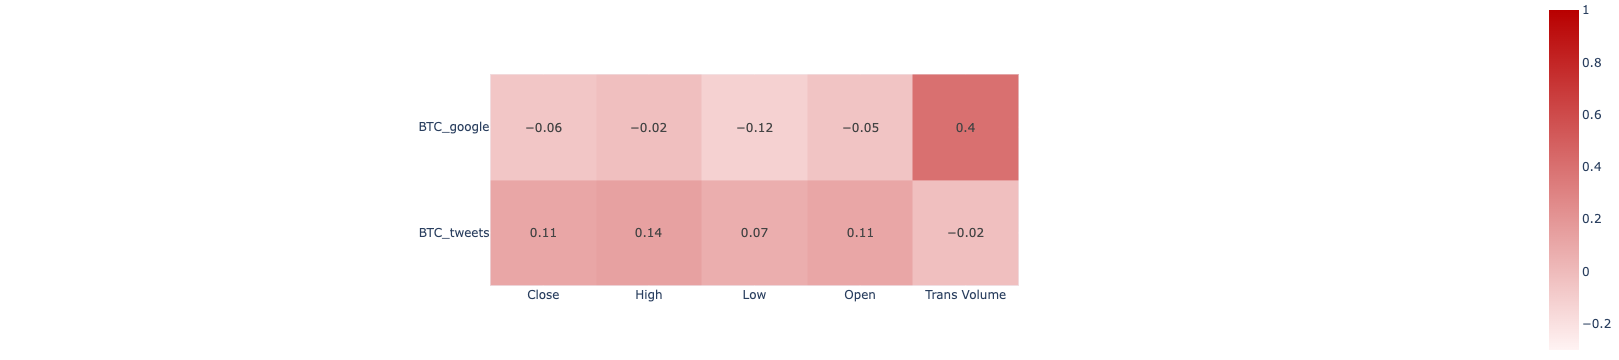

In [26]:
btc_corr = df_BTC.corr()[['BTC_google','BTC_tweets']]

btc_corr = btc_corr.iloc[1:-3].T.round(2)

btc_corr.rename(columns={'BTCUSD_close': 'Close', 'BTCUSD_high': 'High', 'BTCUSD_low': 'Low', 'BTCUSD_open': 'Open',
       'BTC_transactions': 'Trans Volume'}, inplace=True)

colorscale=[[0, 'rgb(255,243,243)'],  [1.0, 'rgb(184, 0, 0)']]

fig = px.imshow(btc_corr, 
                text_auto=True,
                #labels=dict(y="Correlation Heatmap", color="Correlation"),
                color_continuous_scale=colorscale,
                range_color=[-0.3,1])

fig.update_layout(margin=dict(l=0, r=0, t=0, b=0),
                 height=300,width=600)

fig.show()
fig.write_image("btc_corr.jpeg")

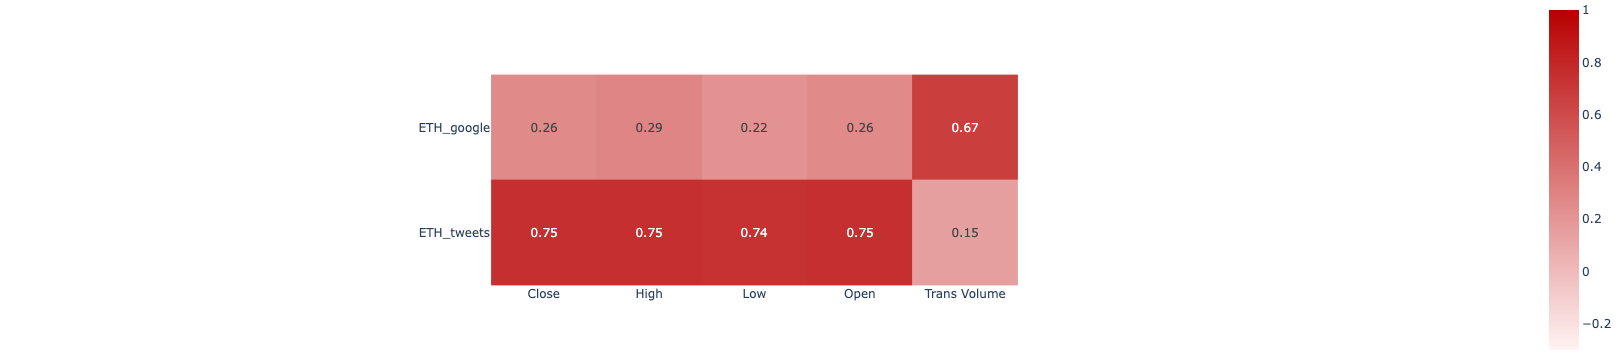

In [27]:
eth_corr = df_ETH.corr()[['ETH_google',
       'ETH_tweets']]

eth_corr = eth_corr.iloc[1:-3].T.round(2)

eth_corr.rename(columns={'ETHUSD_close': 'Close', 'ETHUSD_high': 'High', 'ETHUSD_low': 'Low', 'ETHUSD_open': 'Open',
       'ETH_transactions': 'Trans Volume'}, inplace=True)

colorscale=[[0, 'rgb(255,243,243)'],  [1.0, 'rgb(184, 0, 0)']]

fig = px.imshow(eth_corr, 
                text_auto=True,
                #labels=dict(y="Correlation Heatmap", color="Correlation"),
                color_continuous_scale=colorscale,
                range_color=[-0.3,1])

fig.update_layout(margin=dict(l=0, r=0, t=0, b=0),
                 height=300,width=600)

fig.show()
fig.write_image("eth_corr.jpeg")

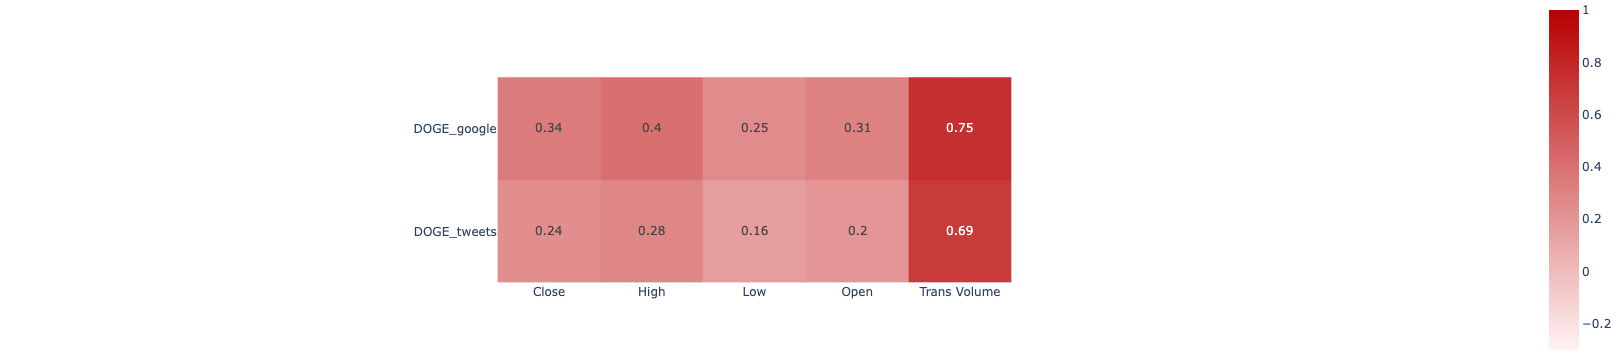

In [28]:
dog_corr = df_DOGE.corr()[['DOGE_google',
       'DOGE_tweets']]

dog_corr = dog_corr.iloc[1:-3].T.round(2)

dog_corr.rename(columns={'DOGEUSD_close': 'Close', 'DOGEUSD_high': 'High', 'DOGEUSD_low': 'Low', 'DOGEUSD_open': 'Open',
       'DOGE_transactions': 'Trans Volume'}, inplace=True)

colorscale=[[0, 'rgb(255,243,243)'],  [1.0, 'rgb(184, 0, 0)']]

fig = px.imshow(dog_corr, 
                text_auto=True,
                #labels=dict(y="Correlation Heatmap", color="Correlation"),
                color_continuous_scale=colorscale, 
                range_color=[-0.3,1])

fig.update_layout(margin=dict(l=0, r=0, t=0, b=0),
                 height=300,width=600)

fig.show()
fig.write_image("dog_corr.jpeg")

**Insights**

- DOGE prices do not have overall correlations with the Twitter volume and sentiment (positive and negative)
- Twitter volume is highly correlated with Google trends, Twitter positive sentiment and Reddit positive sentiment
- Reddit volume is highly correlated with Google trends, and Reddit negative sentiment

Correlations between different crypto prices

In [29]:
df[['BTCUSD_close','ETHUSD_close','DOGEUSD_close']].corr()

,BTCUSD_close,ETHUSD_close,DOGEUSD_close
BTCUSD_close,1.000000,0.554536,0.117532
ETHUSD_close,0.554536,1.000000,0.581394
DOGEUSD_close,0.117532,0.581394,1.000000


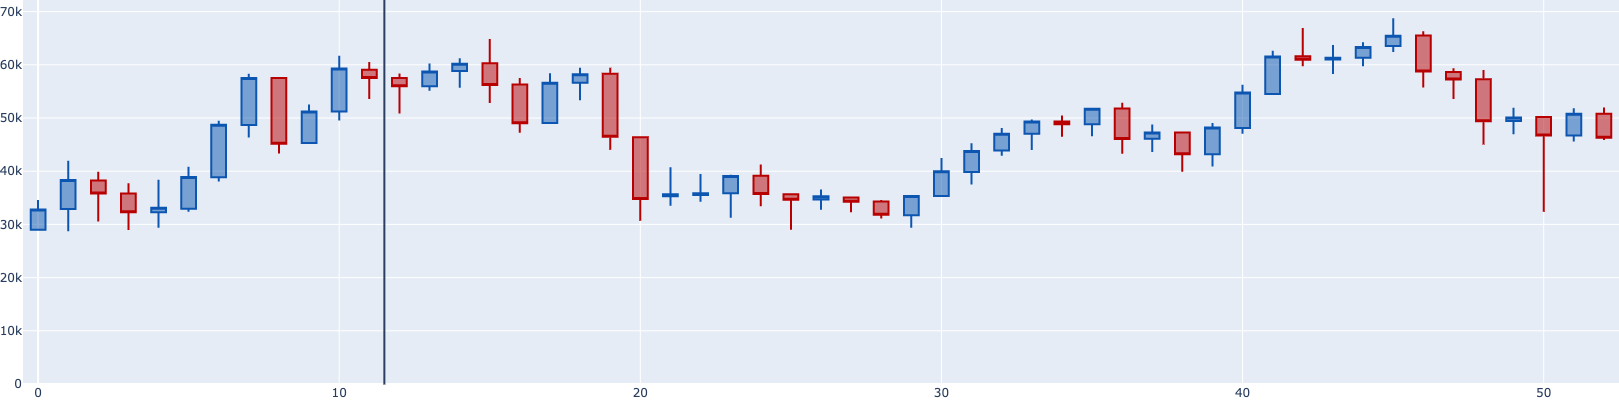

In [30]:
fig = go.Figure(data=[go.Candlestick(x=df_weekly.index,
                open=df_weekly['BTCUSD_open'], high=df_weekly['BTCUSD_high'],
                low=df_weekly['BTCUSD_low'], close=df_weekly['BTCUSD_close'],
                increasing_line_color = '#0c55b0', decreasing_line_color= '#b80000'
                )])

fig.update_layout(xaxis_rangeslider_visible=False,
                 margin=dict(l=0, r=0, t=0, b=0),
                 height=400,width=800,
                 shapes = [#dict(x0=4.5, x1=4.5, y0=0, y1=df_weekly.BTCUSD_high.max()*1.05, xref='x', yref='paper',line_width=2),
                           dict(x0=11.5, x1=11.5, y0=0, y1=df_weekly.BTCUSD_high.max()*1.05, xref='x', yref='paper',line_width=2),
                           #dict(x0=42.5, x1=42.5, y0=0, y1=df_weekly.BTCUSD_high.max()*1.05, xref='x', yref='paper',line_width=2),
                           #dict(x0=49.5, x1=49.5, y0=0, y1=df_weekly.BTCUSD_high.max()*1.05, xref='x', yref='paper',line_width=2)
                          ]
                 )

fig.update_yaxes(range=(0,df_weekly.BTCUSD_high.max()*1.05))
fig.show()
fig.write_image("btc_candle.jpeg")

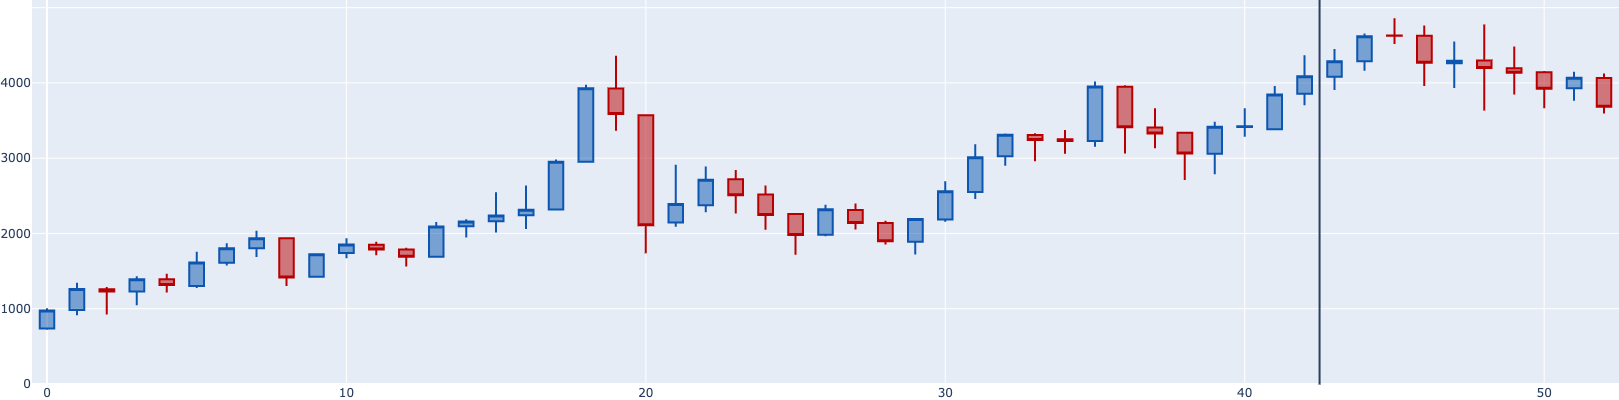

In [31]:
fig = go.Figure(data=[go.Candlestick(x=df_weekly.index,
                open=df_weekly['ETHUSD_open'], high=df_weekly['ETHUSD_high'],
                low=df_weekly['ETHUSD_low'], close=df_weekly['ETHUSD_close'],
                increasing_line_color = '#0c55b0', decreasing_line_color= '#b80000'
                )])

fig.update_layout(xaxis_rangeslider_visible=False,
                 margin=dict(l=0, r=0, t=0, b=0),
                 height=400,width=800,
                 shapes = [#dict(x0=4.5, x1=4.5, y0=0, y1=df_weekly.BTCUSD_high.max()*1.05, xref='x', yref='paper',line_width=2),
                           #dict(x0=11.5, x1=11.5, y0=0, y1=df_weekly.BTCUSD_high.max()*1.05, xref='x', yref='paper',line_width=2),
                           dict(x0=42.5, x1=42.5, y0=0, y1=df_weekly.BTCUSD_high.max()*1.05, xref='x', yref='paper',line_width=2),
                           #dict(x0=49.5, x1=49.5, y0=0, y1=df_weekly.BTCUSD_high.max()*1.05, xref='x', yref='paper',line_width=2)
                          ])
fig.update_yaxes(range=(0,df_weekly.ETHUSD_high.max()*1.05))
fig.show()
fig.write_image("eth_candle.jpeg")

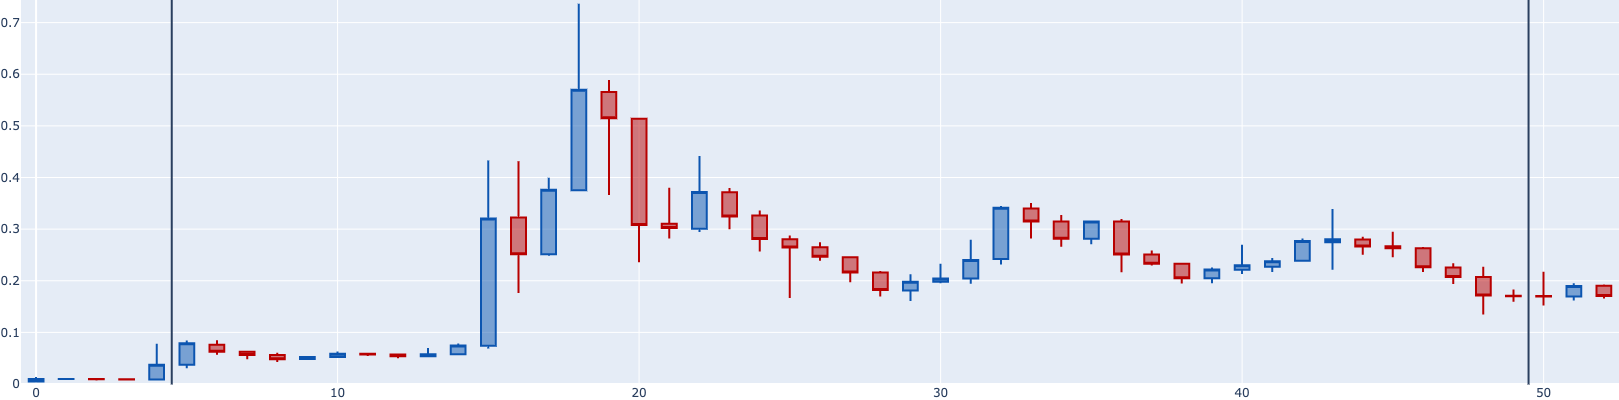

In [32]:
fig = go.Figure(data=[go.Candlestick(x=df_weekly.index,
                open=df_weekly['DOGEUSD_open'], high=df_weekly['DOGEUSD_high'],
                low=df_weekly['DOGEUSD_low'], close=df_weekly['DOGEUSD_close'],
                increasing_line_color = '#0c55b0', decreasing_line_color= '#b80000'
                )])

fig.update_layout(xaxis_rangeslider_visible=False,
                 margin=dict(l=0, r=0, t=0, b=0),
                 height=400,width=800,
                 shapes = [dict(x0=4.5, x1=4.5, y0=0, y1=df_weekly.BTCUSD_high.max()*1.05, xref='x', yref='paper',line_width=2),
                           #dict(x0=11.5, x1=11.5, y0=0, y1=df_weekly.BTCUSD_high.max()*1.05, xref='x', yref='paper',line_width=2),
                           #dict(x0=42.5, x1=42.5, y0=0, y1=df_weekly.BTCUSD_high.max()*1.05, xref='x', yref='paper',line_width=2),
                           dict(x0=49.5, x1=49.5, y0=0, y1=df_weekly.BTCUSD_high.max()*1.05, xref='x', yref='paper',line_width=2)
                          ])
fig.update_yaxes(range=(0,df_weekly.DOGEUSD_high.max()*1.01))
fig.show()
fig.write_image("dog_candle.jpeg")

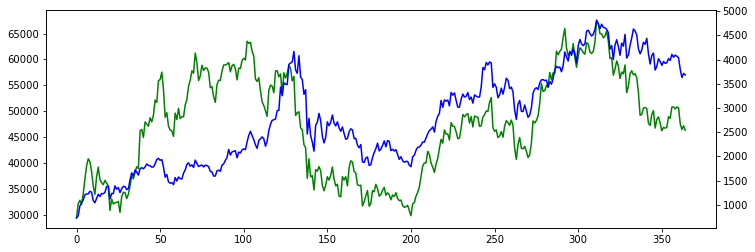

In [33]:
fig, ax = plt.subplots(figsize=(12, 4))
line = ax.plot(df['BTCUSD_close'],'g-', label = 'BTC')
ax2 = ax.twinx()
line = ax2.plot(df['ETHUSD_close'],'b-', label = 'ETH')

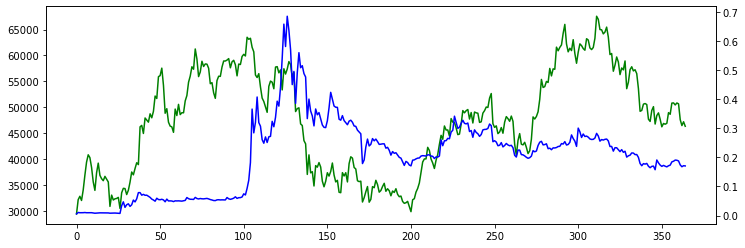

In [34]:
fig, ax = plt.subplots(figsize=(12, 4))
line = ax.plot(df['BTCUSD_close'],'g-', label = 'BTC')
ax2 = ax.twinx()
line = ax2.plot(df['DOGEUSD_close'],'b-', label = 'DOGE')

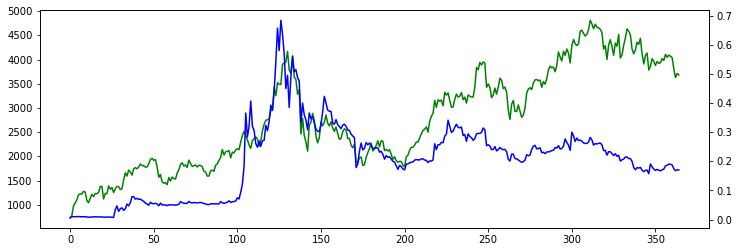

In [35]:
fig, ax = plt.subplots(figsize=(12, 4))
line = ax.plot(df['ETHUSD_close'],'g-', label = 'ETH')
ax2 = ax.twinx()
line = ax2.plot(df['DOGEUSD_close'],'b-', label = 'DOGE')

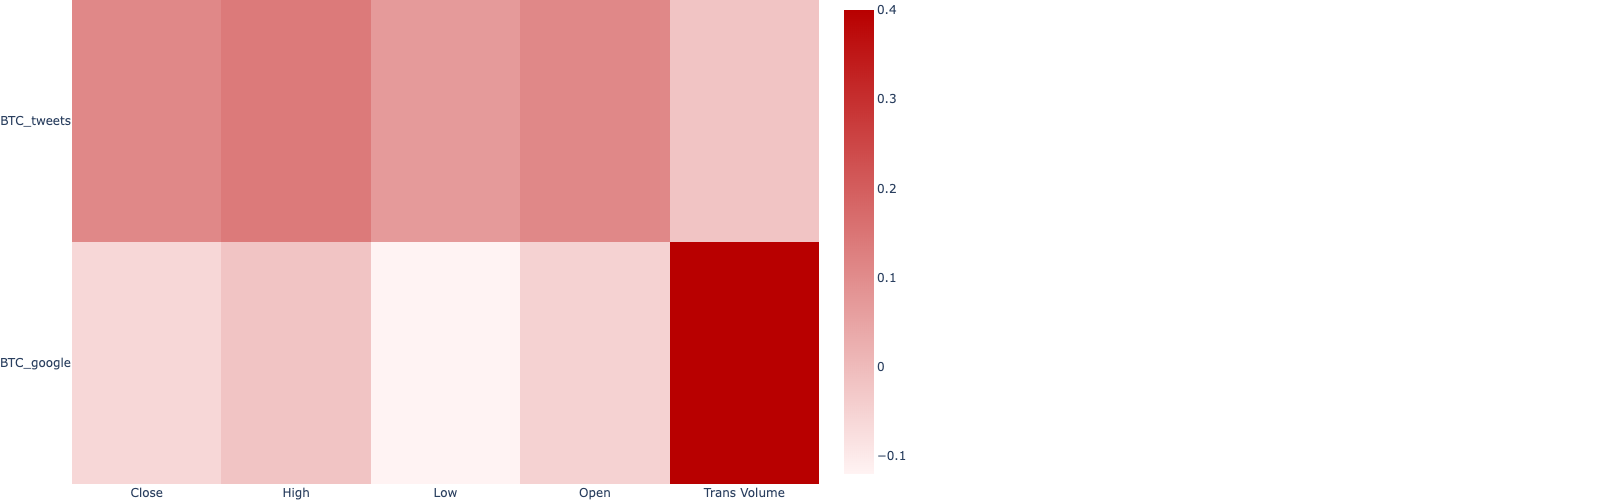

In [36]:
def df_to_plotly(df):
    return {'z': df.values.tolist(),
            'x': df.columns.tolist(),
            'y': df.index.tolist()}

colorscale=[[min(btc_corr.min().min(),0), 'rgb(255,243,243)'], [1.0, 'rgb(184,0,0)']]

colorscale=[[0, 'rgb(255,243,243)'],  [1.0, 'rgb(184, 0, 0)']]

fig = go.Figure()

fig.add_trace(go.Heatmap(df_to_plotly(btc_corr),
                         colorscale=colorscale,
                        visible=True))

fig.update_layout(
                 margin=dict(l=0, r=800, t=0, b=0),
                 height=500)

fig.show()

In [37]:
df2 = df.copy()

In [38]:
df2['datetime'] = pd.to_datetime(df2['datetime'])

In [39]:
df2.set_index(df2.datetime, inplace=True)

Text(0, 0.5, 'Price in USD')

findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.


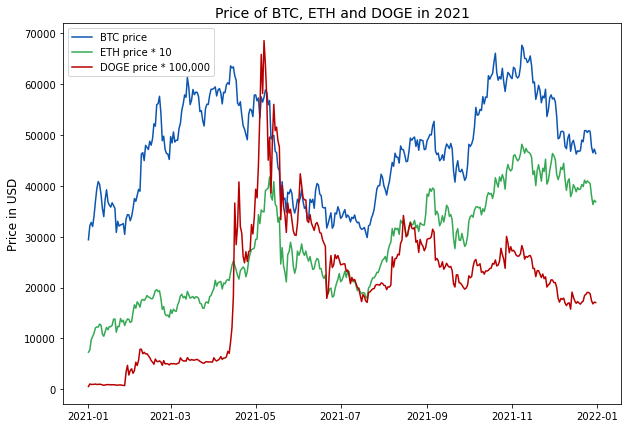

In [40]:
plt.figure(figsize=(10, 7))

plt.plot(df2.BTCUSD_close, label='BTC price', c='#0c55b0')

plt.plot(df2.ETHUSD_close * 10, label='ETH price * 10',c='#34A853')

plt.plot(df2.DOGEUSD_close * 100000, label='DOGE price * 100,000', c='#b80000')

plt.title('Price of BTC, ETH and DOGE in 2021', font='Helvetica',fontsize=14)

plt.legend()

plt.ylabel('Price in USD', font='Helvetica', size=12)